# Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#assessing">Assessing Data</a></li>
<li><a href="#cleaning">Cleaning Data</a></li>
<li><a href="#analyzing">Analysis</a></li>
<li><a href="#conclusion">Conclusion & Next</a></li>
</ul>

<a id='intro'></a>
## Introduction
This notebook is the first part of the wrangling and analysis project of [WeRateDogs](https://twitter.com/dog_rates) Twitter data, which include the coding part of the whole process. The `wrangle_report.html` and `act_report.html` only contain the thinking process of my analysis. So if you want to skip reading the code, which is kinda long, please feel free to check out those reports instead :p

In [1]:
import pandas as pd
import numpy as np
import requests
import os
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import warnings
warnings.filterwarnings('ignore')

<a id='wrangling'></a>
## Data Wrangling

### Gathering Data

1. The WeRateDogs Twitter archive
> Uploaded the file.

In [2]:
archive = pd.read_csv('twitter-archive-enhanced.csv')

2. The tweet image predictions

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [4]:
with open(os.path.join(url.split('/')[-1]), mode = 'wb') as file:
         file.write(response.content)

In [5]:
os.listdir()

['twitter-archive-enhanced.csv',
 'twitter_archive_master.csv',
 'Source.PNG',
 'tweet_json.txt',
 'retweet_ratings.png',
 'favorite_rating.png',
 'image-predictions.tsv',
 'wrangle_report.html',
 'dog.jpg',
 '.ipynb_checkpoints',
 'wrangle_report.ipynb',
 'wrangle_act.ipynb',
 'box.png',
 'Act_Report.ipynb',
 'Act_Report.html']

3. Additional data from Twitter API.

In [6]:
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)
## Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = archive.tweet_id.values
len(tweet_ids)
## Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
## Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    ## This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))        
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start) 
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293: 838083903487373313
Success


Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success
550: 805207613751304193
Success
551: 804738756058218496
Success


Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807: 772102971039580160
Success
808: 771908950375665664
Success
809: 771770456517009408
Success
810

Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
1062: 741303864243200000
Success
1063: 741099773336379392
Success
1064: 741067306818797568
Success
10

Success
1284: 708711088997666817
Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
1311: 707038192327901184
Success
1312: 707021089608753152
Success
1313: 707014260413456384
Success
13

Success
1533: 690005060500217858
Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
1560: 688547210804498433
Success
1561: 688519176466644993
Success
1562: 688385280030670848
Success
15

Success
1782: 677698403548192770
Success
1783: 677687604918272002
Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
1811: 676821958043033607
Success
18

Success
2031: 671789708968640512
Success
2032: 671768281401958400
Success
2033: 671763349865160704
Success
2034: 671744970634719232
Success
2035: 671743150407421952
Success
2036: 671735591348891648
Success
2037: 671729906628341761
Success
2038: 671561002136281088
Success
2039: 671550332464455680
Success
2040: 671547767500775424
Success
2041: 671544874165002241
Success
2042: 671542985629241344
Success
2043: 671538301157904385
Success
2044: 671536543010570240
Success
2045: 671533943490011136
Success
2046: 671528761649688577
Success
2047: 671520732782923777
Success
2048: 671518598289059840
Success
2049: 671511350426865664
Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
2058: 671355857343524864
Success
2059: 671347597085433856
Success
2060: 671186162933985280
Success
20

Success
2281: 667393430834667520
Success
2282: 667369227918143488
Success
2283: 667211855547486208
Success
2284: 667200525029539841
Success
2285: 667192066997374976
Success
2286: 667188689915760640
Success
2287: 667182792070062081
Success
2288: 667177989038297088
Success
2289: 667176164155375616
Success
2290: 667174963120574464
Success
2291: 667171260800061440
Success
2292: 667165590075940865
Success
2293: 667160273090932737
Success
2294: 667152164079423490
Success
2295: 667138269671505920
Success
2296: 667119796878725120
Success
2297: 667090893657276420
Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
2307: 666835007768551424
Success
2308: 666826780179869698
Success
2309: 666817836334096384
Success
2310: 666804364988780544
Success
23

FileNotFoundError: [Errno 2] No such file or directory: 'tweet-json.txt'

In [6]:
data = pd.DataFrame(columns=['tweet_id', 'retweet_count', 'favorite_count'])
with open('tweet_json.txt') as f:
    for line in f:
        status  = json.loads(line)
        tweet_id = status['id_str']
        retweet_count = status['retweet_count']
        favorite_count = status['favorite_count']
        data = data.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
                                        columns=['tweet_id', 'retweet_count', \
                                                 'favorite_count']))
data = data.reset_index(drop=True)

<a id='assessing'></a>
## Assessing Data

I first used visual assessment, both here and in Excel, and then programming assessment to find out data quality and tidiness issues.

In [7]:
archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [8]:
archive.info()
# There are some replies and retweets.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
965,750429297815552001,NaN,NaN,2016-07-05 20:41:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Arnie. He's a Nova Scotian Fridge Floo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750429297...,12,10,Arnie,None,None,None,None
1311,707021089608753152,NaN,NaN,2016-03-08 01:52:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tucker. He's a Dasani Episcopalian. Go...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/707021089...,12,10,Tucker,None,None,None,None
237,847157206088847362,NaN,NaN,2017-03-29 18:43:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Daisy. She's been pup for adoption for mo...,NaN,NaN,NaN,"https://www.petfinder.com/petdetail/37334596,h...",11,10,Daisy,None,None,None,None
1231,713177543487135744,NaN,NaN,2016-03-25 01:35:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lance. Lance doesn't give a shit. 10/1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713177543...,10,10,Lance,None,None,None,None
875,761227390836215808,NaN,NaN,2016-08-04 15:48:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Albert. He just found out that bees ar...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/761227390...,10,10,Albert,None,None,None,None


In [10]:
archive.describe()
# IDs should be strings.

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [11]:
archive[archive.duplicated()]
# There is no duplicates

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [12]:
image = pd.read_csv('image-predictions.tsv', sep='\t')
image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [13]:
image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [15]:
data

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7253,34714
1,892177421306343426,5434,30081
2,891815181378084864,3583,22637
3,891689557279858688,7459,37991
4,891327558926688256,8010,36272
5,891087950875897856,2686,18292
6,890971913173991426,1732,10652
7,890729181411237888,16309,58469
8,890609185150312448,3732,25187
9,890240255349198849,6301,28709


In [16]:
data.info()
# Retweet_count and favorite_count should be integers.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id          2331 non-null object
retweet_count     2331 non-null object
favorite_count    2331 non-null object
dtypes: object(3)
memory usage: 54.7+ KB


### Quality
##### `Enhanced Twitter Archive` 
* Tweet_id column dtype is int, should be string.
* Timestamp column dtype should be datetime.
* There are 181 retweets in this dataset that need to be removed.
* There are 78 replies in this dataset that need to be removed.
* Not every tweet has identified dog stages.
* Some of the rating denominators are not 10.
* Wrong ratings like *'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer.'*, where rating numerator & denominator are 24 & 7, and *'This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv'*, where rating numerator & denominator are 1 & 2.

##### `image` Table
* Tweet_id column dtype is int.
* More than one predictions in for dogs in one single tweet.
* There are non-dog predictions.

##### `Data` Table
* Count columns have object type instead of integer type.

### Tidiness
##### `Enhanced Twitter Archive` 
* Dog stages are not in one column.
* There are 2 columns related to rating, should be just one.

##### `All three tables` 
* 3 datasets are not merged.

<a id='cleaning'></a>
## Cleaning Data

### Define
1. Convert dtype of timestamp column in `archive` dataset from object to datetime.
2. Convert dtype of tweet_id column in `archive` dataset from int to string.
3. Remove 181 retweets from `archive` dataset, delete retweets related columns.
4. Remove 78 replies from `archive` dataset, delete replies related columns.
5. Delete row with texts `Meet Sam. She smiles 24/7 & secretly aspires to be a reindeer.` Change numerator and denominator of rows with texts `This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv.`,`After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ`, `Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a`, `This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq`, `This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5`.
6. Create a new column 'rating' using rating_numerator and rating_denominator, and drop rating_numerator amd rating_denominator columns.
7. Convert `data` dataset's count columns' dtype from object to integer.
8. Change tweet_id dtype to string.
9. Remove p2 and p3 related columns from `image` dataset.
10. Remove non-dog predictions rows from `image` dataset.
11. Put dog stages into one column.
12. Merge 3 datasets.

### Code

In [50]:
# Convert dtype of timestamp column in archive dataset from object to datetime.
archive_clean = archive.copy()
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])

In [51]:
# Convert dtype of tweet_id column in archive dataset from int to string.
archive_clean['tweet_id'] = archive_clean['tweet_id'].apply(str)

In [52]:
# Remove 181 retweets from `archive` dataset, delete retweets related columns.
archive_clean = archive_clean[archive_clean['retweeted_status_id'].isnull()]
archive_clean.drop(columns = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace = True)

In [53]:
# Remove 78 replies from `archive` dataset, delete replies related columns.
archive_clean = archive_clean[archive_clean['in_reply_to_status_id'].isnull()]
archive_clean.drop(columns = ['in_reply_to_status_id', 'in_reply_to_user_id'], inplace = True)

In [54]:
# Delete row with no rating in texts.
archive_clean = archive_clean[archive_clean['expanded_urls'] != 'https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1']                              

In [55]:
# Correct some rows' ratings

# Get index of rows with wrong ratings
def get_index(url):
    index = archive_clean[archive_clean.loc[:, 'expanded_urls'] == url].index
    return index
# Then change individual row's ratings.
def change_rating(row, numerator, denominator):
    archive_clean.loc[row, ['rating_numerator', 'rating_denominator']] = [numerator, denominator]

In [56]:
url1 = 'https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1'
change_rating(get_index(url1), 14, 10)
url2 = 'https://twitter.com/dog_rates/status/722974582966214656/photo/1'
change_rating(get_index(url2), 13, 10)
url3 = 'https://twitter.com/dog_rates/status/716439118184652801/photo/1'
change_rating(get_index(url3), 11, 10)
url4 = 'https://twitter.com/dog_rates/status/682962037429899265/photo/1'
change_rating(get_index(url4), 10, 10)
url5 = 'https://twitter.com/dog_rates/status/666287406224695296/photo/1'
change_rating(get_index(url5), 9, 10)

In [57]:
# Create a new column 'rating' using rating_numerator and rating_denominator, and drop rating_numerator amd rating_denominator columns.
archive_clean['rating'] = archive_clean['rating_numerator'] / archive_clean['rating_denominator']
archive_clean.drop(columns = ['rating_numerator', 'rating_denominator'], inplace = True)

In [59]:
# Change tweet_id dtype to string in image dataset.
image_clean = image.copy()
image_clean.tweet_id = image_clean.tweet_id.apply(str)

In [60]:
# Remove p2 and p3 related columns from `image` dataset.
image_clean = image_clean.drop(columns = ['p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'])

In [61]:
# Remove non-dog predictions rows from `image` dataset.
image_clean = image_clean[image_clean['p1_dog'] == True]

In [62]:
# Put dog stages into one column.
# Replace None in stage columns with empty string.
for col in ['doggo', 'floofer', 'pupper', 'puppo']:
    archive_clean[col].replace('None', '', inplace = True)  

# Then combine stage columns.
archive_clean['stage'] = archive_clean.doggo + archive_clean.floofer + archive_clean.pupper + archive_clean.puppo

# Check how if there are multiple stages in a tweet.
archive_clean['stage'].value_counts()

                1760
pupper           221
doggo             72
puppo             23
doggopupper        9
floofer            9
doggopuppo         1
doggofloofer       1
Name: stage, dtype: int64

In [63]:
# Deal with multiple stages in a tweet.
archive_clean.loc[archive_clean.stage == 'doggopupper', 'stage'] = 'doggo, pupper'
archive_clean.loc[archive_clean.stage == 'doggopuppo', 'stage'] = 'doggo, puppo'
archive_clean.loc[archive_clean.stage == 'doggofloofer', 'stage'] = 'doggo, floofer'

# handle missing values
archive_clean.loc[archive_clean.stage == '', 'stage'] = np.nan

In [70]:
# Merge 3 datasets.
data_clean = data.copy()
df_final = archive_clean.merge(image_clean, how = 'left', on = 'tweet_id')
df_final = df_final.merge(data_clean, how = 'left', on = 'tweet_id')

In [80]:
# Convert `data` dataset's count columns' dtype from object to integer.
for col in ['retweet_count', 'favorite_count']:
    df_final[col] = df_final[col].fillna(0)
    df_final[col] =  df_final[col].apply(int)

### Test

In [81]:
# Let's see if we successfully merged 3 datasets.
df_final.head()
# We have dealt with `12. Merge 3 datasets.`

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,rating,stage,jpg_url,img_num,p1,p1_conf,p1_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,,,,,1.3,NaN,NaN,NaN,NaN,NaN,NaN,7253,34714
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,,,,,1.3,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,5434,30081
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,,,,,1.2,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,3583,22637
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,,,,,1.3,NaN,NaN,NaN,NaN,NaN,NaN,7459,37991
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,,,,,1.2,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,8010,36272


In [82]:
df_final.info()
# This info shows problem # 6. Create a new column 'rating' was solved. There is only one one rating column now.
# There are no retweets and replies columns, which means problem # 3 & # 4. remove retweets and replies rows are solved.
# Dtypes are correct now, tweet_id is string, timestamp column is datetime, 
# retweet_count amd favorite_count columns are integers. 
# Problem # 1, 2, 7 & 8 are solved.
# There's no 02, p3 related columsn, problem # 9 is solved.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2096 entries, 0 to 2095
Data columns (total 19 columns):
tweet_id          2096 non-null object
timestamp         2096 non-null datetime64[ns]
source            2096 non-null object
text              2096 non-null object
expanded_urls     2093 non-null object
name              2096 non-null object
doggo             2096 non-null object
floofer           2096 non-null object
pupper            2096 non-null object
puppo             2096 non-null object
rating            2096 non-null float64
stage             336 non-null object
jpg_url           1462 non-null object
img_num           1462 non-null float64
p1                1462 non-null object
p1_conf           1462 non-null float64
p1_dog            1462 non-null object
retweet_count     2096 non-null int64
favorite_count    2096 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(2), object(13)
memory usage: 327.5+ KB


In [77]:
df_final[df_final['retweet_count'].isnull()]

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,rating,stage,jpg_url,img_num,p1,p1_conf,p1_dog,retweet_count,favorite_count
90,872261713294495745,2017-06-07 01:19:32,"<a href=""http://twitter.com/download/iphone"" r...",This is Harry. His ears are activated one at a...,https://twitter.com/dog_rates/status/872261713...,Harry,,,,,1.3,NaN,https://pbs.twimg.com/media/DBrlZk2UQAAfAkd.jpg,2.0,Labrador_retriever,0.972019,True,NaN,NaN
202,844704788403113984,2017-03-23 00:18:10,"<a href=""http://twitter.com/download/iphone"" r...",This is Luna. It's her first time outside and ...,https://twitter.com/dog_rates/status/844704788...,Luna,,,,,1.3,NaN,https://pbs.twimg.com/media/C7j-hkSW0AIxCZC.jpg,1.0,Labrador_retriever,0.980213,True,NaN,NaN
234,837366284874571778,2017-03-02 18:17:34,"<a href=""http://twitter.com/download/iphone"" r...",This is Lucy. She has a portrait of herself on...,https://twitter.com/dog_rates/status/837366284...,Lucy,,,,,1.3,NaN,https://pbs.twimg.com/media/C57sMJwXMAASBSx.jpg,1.0,American_Staffordshire_terrier,0.660085,True,NaN,NaN
284,829374341691346946,2017-02-08 17:00:26,"<a href=""http://twitter.com/download/iphone"" r...",This is Astrid. She's a guide doggo in trainin...,https://twitter.com/dog_rates/status/829374341...,Astrid,doggo,,,,1.3,doggo,https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg,1.0,Staffordshire_bullterrier,0.757547,True,NaN,NaN
574,779123168116150273,2016-09-23 01:00:13,"<a href=""http://twitter.com/download/iphone"" r...",This is Reggie. He hugs everyone he meets. 12/...,https://twitter.com/dog_rates/status/779123168...,Reggie,,,,,1.2,NaN,https://pbs.twimg.com/media/CtAAYizW8AAWzBZ.jpg,1.0,toy_poodle,0.431080,True,NaN,NaN
726,754011816964026368,2016-07-15 17:56:40,"<a href=""http://twitter.com/download/iphone"" r...",This is Charlie. He pouts until he gets to go ...,https://twitter.com/dog_rates/status/754011816...,Charlie,,,,,1.2,NaN,https://pbs.twimg.com/media/CnbJuPoXEAAjcVF.jpg,1.0,French_bulldog,0.600985,True,NaN,NaN
1487,680055455951884288,2015-12-24 16:00:30,"<a href=""https://about.twitter.com/products/tw...","Meet Sammy. At first I was like ""that's a snow...",https://twitter.com/dog_rates/status/680055455...,Sammy,,,,,1.0,NaN,https://pbs.twimg.com/media/CW-ZRC_WQAAyFrL.jpg,1.0,Samoyed,0.995466,True,NaN,NaN


In [83]:
df_final['stage'].value_counts()
# Merged dog stage column is correct now. Problem # 11 is solved.

pupper            221
doggo              72
puppo              23
doggo, pupper       9
floofer             9
doggo, floofer      1
doggo, puppo        1
Name: stage, dtype: int64

In [84]:
# Problem 5, delete row with no ratings in texts.
df_final[df_final['expanded_urls'] == 'https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1']                              

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,rating,stage,jpg_url,img_num,p1,p1_conf,p1_dog,retweet_count,favorite_count


In [85]:
# Problem 5 cont. correct wrong ratings
url1 = 'https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1'

url2 = 'https://twitter.com/dog_rates/status/722974582966214656/photo/1'

url3 = 'https://twitter.com/dog_rates/status/716439118184652801/photo/1'

url4 = 'https://twitter.com/dog_rates/status/682962037429899265/photo/1'

url5 = 'https://twitter.com/dog_rates/status/666287406224695296/photo/1'

df_final[df_final['expanded_urls'].isin([url1, url2, url3, url4, url5])]
# The ratings seems normal now. Problem # 5 is solved.

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,rating,stage,jpg_url,img_num,p1,p1_conf,p1_dog,retweet_count,favorite_count
852,740373189193256964,2016-06-08 02:41:38,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,None,,,,,1.4,NaN,https://pbs.twimg.com/media/CkZVdJ6WYAAXZ5A.jpg,3.0,golden_retriever,0.807644,True,12563,33451
947,722974582966214656,2016-04-21 02:25:47,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,https://twitter.com/dog_rates/status/722974582...,None,,,,,1.3,NaN,https://pbs.twimg.com/media/CgiFjIpWgAA4wVp.jpg,1.0,Great_Dane,0.246762,True,1474,3889
984,716439118184652801,2016-04-03 01:36:11,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,Bluebert,,,,,1.1,NaN,https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg,1.0,Siberian_husky,0.396495,True,198,2273
1425,682962037429899265,2016-01-01 16:30:13,"<a href=""http://twitter.com/download/iphone"" r...",This is Darrel. He just robbed a 7/11 and is i...,https://twitter.com/dog_rates/status/682962037...,Darrel,,,,,1.0,NaN,NaN,NaN,NaN,NaN,NaN,15437,34921
2075,666287406224695296,2015-11-16 16:11:11,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,https://twitter.com/dog_rates/status/666287406...,an,,,,,0.9,NaN,https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg,1.0,Maltese_dog,0.857531,True,57,128


In [87]:
# Problem # 10. Remove non-dog predictions rows from image dataset.
df_final[df_final.p1_dog == False]
# There's no record now. Problem # 10 is solved!
# Now all issues are solved now!

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,rating,stage,jpg_url,img_num,p1,p1_conf,p1_dog,retweet_count,favorite_count


<a id='analyzing'></a>
## Storing, analyzing, and visualizing your wrangled data

### Storing

In [83]:
df_final.to_csv("twitter_archive_master.csv", index = False)

### Analyzing

In [28]:
# Import useful libraries.
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [89]:
# Let's take a look at the dataset first.
df_final.head()

,tweet_id,timestamp,source,text,expanded_urls,name,rating,stage,jpg_url,img_num,p1,p1_conf,p1_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,1.3,,NaN,NaN,NaN,NaN,NaN,7253.0,34714.0
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,1.3,,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,5434.0,30081.0
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,1.2,,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,3583.0,22637.0
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,1.3,,NaN,NaN,NaN,NaN,NaN,7459.0,37991.0
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,1.2,,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,8010.0,36272.0


In [90]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2096 entries, 0 to 2095
Data columns (total 15 columns):
tweet_id          2096 non-null object
timestamp         2096 non-null datetime64[ns]
source            2096 non-null object
text              2096 non-null object
expanded_urls     2093 non-null object
name              2096 non-null object
rating            2096 non-null float64
stage             2096 non-null object
jpg_url           1462 non-null object
img_num           1462 non-null float64
p1                1462 non-null object
p1_conf           1462 non-null float64
p1_dog            1462 non-null object
retweet_count     2089 non-null float64
favorite_count    2089 non-null float64
dtypes: datetime64[ns](1), float64(5), object(9)
memory usage: 262.0+ KB


In [91]:
df_final.describe()

,rating,img_num,p1_conf,retweet_count,favorite_count
count,2096.000000,1462.000000,1462.000000,2089.000000,2089.000000
mean,1.169418,1.212722,0.614867,2386.927717,8006.302537
std,3.966472,0.573689,0.260251,4178.798670,11645.427587
min,0.000000,1.000000,0.044333,11.000000,68.000000
25%,1.000000,1.000000,0.392734,530.000000,1776.000000
50%,1.100000,1.000000,0.615709,1155.000000,3645.000000
75%,1.200000,1.000000,0.853256,2715.000000,9996.000000
max,177.600000,4.000000,0.999956,73318.000000,149048.000000


> Looks like there's some outliers in ratings, I'll remove rows with ratings higher than 2.

In [29]:
df_final = df_final[df_final['rating'] <= 2]

### What's the distribution of ratings?

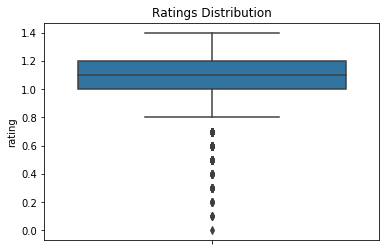

In [33]:
sb.boxplot(y = df_final.rating);
plt.title('Ratings Distribution')
plt.savefig('box.png')

##### About half of the ratings are in range (1.0, 1.2), and 3/4 of people gave ratings over 1.0.

### What source do people come from the most?

In [39]:
pd.DataFrame(df_final.source.value_counts())

,source
"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",1959
"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",91
"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",31
"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",10


##### People tend to check out WeRateDogs Twitter from there iPhones.

### Is there a correlation between retweet_count and ratings?

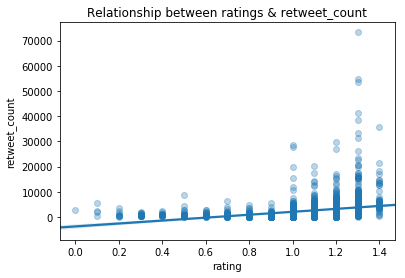

In [34]:
sb.regplot(data = df_final, x = "rating", y = "retweet_count", scatter_kws = {'alpha': 0.3});
plt.title('Relationship between ratings & retweet_count')
plt.savefig('retweet_ratings.png')

##### From the plot, we can see as the ratings go up, retweet_count tend to be higher too.

### Is there a correlation between favorite_count and ratings?

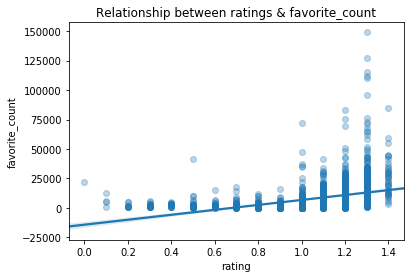

In [35]:
sb.regplot(data = df_final, x = 'rating', y = 'favorite_count', scatter_kws = {'alpha': 0.3});
plt.title('Relationship between ratings & favorite_count')
plt.savefig('favorite_rating.png')

##### From the plot, we can see as the ratings go up, there are more favorite_count too.

<a id='conclusion'></a>
## Conclusion & Things to improve
From the visualizations, we can clearly see there's a positive correlation between ratings and retweet_count/favorite_count, which is not surprising. And people seem to check out this Twitter account more from their IPhones. And, of course, people are generous about rating those very cute dogs, with 75% of the ratings over 1.0.

Certainly there are more to explore with this data. For example, the stage of the dogs clearly has a lot missing. I haven't got a chance to explore the prediction model provided, and there are other useful columns I haven't analyzed yet.